In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/flowers

/content/drive/MyDrive/flowers


In [ ]:
pwd

'/content/drive/MyDrive/flowers'

In [ ]:
!unzip Flowers-Dataset.zip

unzip:  cannot find or open Flowers-Dataset.zip, Flowers-Dataset.zip.zip or Flowers-Dataset.zip.ZIP.


IMAGE AUGMENTATION

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.3,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size= (64,64),class_mode= "categorical",batch_size= 24)

Found 4317 images belonging to 5 classes.


In [5]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size= (64,64),class_mode= "categorical",batch_size= 24)

Found 4317 images belonging to 5 classes.


In [6]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CREATE MODEL

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model = Sequential()

ADD LAYERS

In [9]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1, 1),input_shape =(64,64,3)))

In [10]:
model.add(MaxPooling2D(strides=(1, 1)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [14]:
model.add(Dense(5,activation="softmax"))

COMPILE THE MODEL

In [15]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
len(x_train)

180

FIT THE MODEL

In [17]:
model.fit(x_train,epochs = 10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
180/180 [==============================] - 1124s 6s/step - loss: 1.5705 - accuracy: 0.4786 - val_loss: 1.3687 - val_accuracy: 0.5237
Epoch 2/10
180/180 [==============================] - 112s 624ms/step - loss: 1.0730 - accuracy: 0.5687 - val_loss: 1.1351 - val_accuracy: 0.5861
Epoch 3/10
180/180 [==============================] - 113s 628ms/step - loss: 1.0023 - accuracy: 0.6101 - val_loss: 0.9273 - val_accuracy: 0.6444
Epoch 4/10
180/180 [==============================] - 113s 628ms/step - loss: 0.9405 - accuracy: 0.6345 - val_loss: 0.9750 - val_accuracy: 0.6310
Epoch 5/10
180/180 [==============================] - 113s 629ms/step - loss: 0.9297 - accuracy: 0.6389 - val_loss: 0.9436 - val_accuracy: 0.6537
Epoch 6/10
180/180 [==============================] - 113s 627ms/step - loss: 0.8970 - accuracy: 0.6549 - val_loss: 0.8828 - val_accuracy: 0.6683
Epoch 7/10
180/180 [==============================] - 113s 627ms/step - loss: 0.8829 - accuracy: 0.6572 - val_loss: 0.8352 - v

SAVE THE MODEL

In [18]:
model.save("flower.h5")

TEST THE MODEL

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model = load_model("flower.h5")

In [22]:
img = image.load_img(r"/content/drive/MyDrive/flowers/rose/10503217854_e66a804309.jpg")

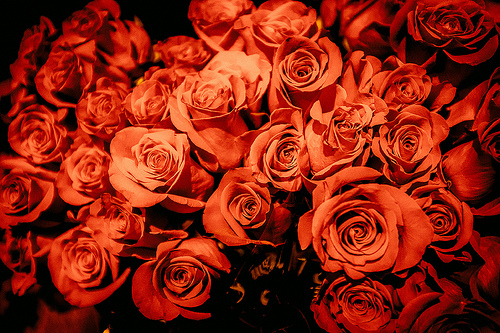

In [23]:
img

In [24]:
img = image.load_img(r"/content/drive/MyDrive/flowers/rose/10503217854_e66a804309.jpg",target_size=(64,64))

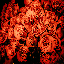

In [25]:
img

In [26]:
x = image.img_to_array(img)

In [27]:
x

array([[[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [ 92.,  14.,   0.],
        [ 61.,  13.,   9.],
        [ 17.,   7.,   5.]],

       [[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [150.,   3.,   0.],
        [ 85.,  10.,   7.],
        [119.,   4.,   1.]],

       [[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [ 88.,   9.,   0.],
        [207.,   7.,  10.],
        [152.,   0.,   0.]],

       ...,

       [[  0.,   4.,   0.],
        [  1.,   3.,   0.],
        [  0.,   2.,   0.],
        ...,
        [  2.,   2.,   4.],
        [  0.,   2.,   5.],
        [ 51.,  10.,   6.]],

       [[  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [  1.,   3.,   0.],
        ...,
        [  0.,   3.,   1.],
        [  0.,   3.,   4.],
        [  0.,   5.,   3.]],

       [[  1.,   3.,   0.],
        [  0.,   2.,   0.],
        [  1.,  

In [28]:
x = np.expand_dims(x,axis = 0)

In [29]:
x

array([[[[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   2.,   0.],
         ...,
         [ 92.,  14.,   0.],
         [ 61.,  13.,   9.],
         [ 17.,   7.,   5.]],

        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   2.,   0.],
         ...,
         [150.,   3.,   0.],
         [ 85.,  10.,   7.],
         [119.,   4.,   1.]],

        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   2.,   0.],
         ...,
         [ 88.,   9.,   0.],
         [207.,   7.,  10.],
         [152.,   0.,   0.]],

        ...,

        [[  0.,   4.,   0.],
         [  1.,   3.,   0.],
         [  0.,   2.,   0.],
         ...,
         [  2.,   2.,   4.],
         [  0.,   2.,   5.],
         [ 51.,  10.,   6.]],

        [[  0.,   2.,   0.],
         [  1.,   3.,   0.],
         [  1.,   3.,   0.],
         ...,
         [  0.,   3.,   1.],
         [  0.,   3.,   4.],
         [  0.,   5.,   3.]],

        [[  1.,   3.,   0.],
       

In [30]:
pred = model.predict(x)

1/1 [==============================] - 0s 164ms/step


In [31]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [35]:
index = ["daisy","dandelion","rose","sunflower","tulip"]

In [36]:
index[np.argmax(pred)]

'tulip'

In [38]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/1008566138_6927679c8a.jpg")

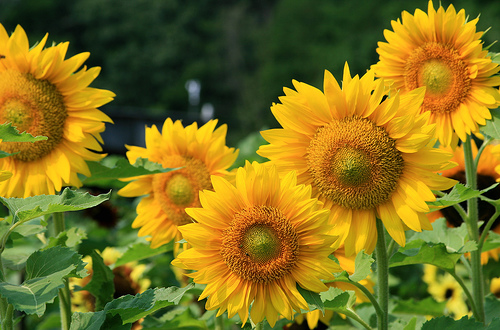

In [39]:
img

In [40]:
img = image.load_img(r"/content/drive/MyDrive/flowers/sunflower/1008566138_6927679c8a.jpg",target_size=(64,64))

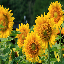

In [41]:
img

In [42]:
x = image.img_to_array(img)

In [43]:
x

array([[[ 30.,  50.,  38.],
        [ 29.,  50.,  35.],
        [ 22.,  42.,  30.],
        ...,
        [ 11.,  32.,  13.],
        [ 16.,  38.,  17.],
        [ 25.,  48.,  19.]],

       [[ 23.,  46.,  28.],
        [ 23.,  46.,  28.],
        [ 17.,  35.,  21.],
        ...,
        [ 23.,  50.,  19.],
        [ 28.,  58.,  24.],
        [ 29.,  61.,  20.]],

       [[ 24.,  49.,  28.],
        [ 19.,  45.,  20.],
        [ 11.,  32.,  15.],
        ...,
        [ 46.,  75.,  19.],
        [ 40.,  72.,  31.],
        [ 27.,  57.,  21.]],

       ...,

       [[ 88., 122.,  46.],
        [ 39.,  74.,  16.],
        [ 39.,  78.,  23.],
        ...,
        [ 49.,  79.,  25.],
        [ 61., 107.,  60.],
        [ 61., 114.,  72.]],

       [[ 73., 111.,  36.],
        [ 32.,  71.,   8.],
        [ 40.,  50.,  25.],
        ...,
        [ 45.,  85.,  33.],
        [ 74., 106.,  67.],
        [ 52., 103.,  47.]],

       [[ 88., 114.,  49.],
        [ 34.,  69.,  13.],
        [ 39.,  

In [44]:
x = np.expand_dims(x,axis = 0)

In [45]:
x

array([[[[ 30.,  50.,  38.],
         [ 29.,  50.,  35.],
         [ 22.,  42.,  30.],
         ...,
         [ 11.,  32.,  13.],
         [ 16.,  38.,  17.],
         [ 25.,  48.,  19.]],

        [[ 23.,  46.,  28.],
         [ 23.,  46.,  28.],
         [ 17.,  35.,  21.],
         ...,
         [ 23.,  50.,  19.],
         [ 28.,  58.,  24.],
         [ 29.,  61.,  20.]],

        [[ 24.,  49.,  28.],
         [ 19.,  45.,  20.],
         [ 11.,  32.,  15.],
         ...,
         [ 46.,  75.,  19.],
         [ 40.,  72.,  31.],
         [ 27.,  57.,  21.]],

        ...,

        [[ 88., 122.,  46.],
         [ 39.,  74.,  16.],
         [ 39.,  78.,  23.],
         ...,
         [ 49.,  79.,  25.],
         [ 61., 107.,  60.],
         [ 61., 114.,  72.]],

        [[ 73., 111.,  36.],
         [ 32.,  71.,   8.],
         [ 40.,  50.,  25.],
         ...,
         [ 45.,  85.,  33.],
         [ 74., 106.,  67.],
         [ 52., 103.,  47.]],

        [[ 88., 114.,  49.],
       

In [46]:
pred = model.predict(x)

1/1 [==============================] - 0s 50ms/step


In [47]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
index = ["daisy","dandelion","rose","sunflower","tulip"]

In [49]:
index[np.argmin(pred)]

'daisy'